In [5]:
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


Bad key "text.kerning_factor" on line 4 in
/Users/YashKeswani/Desktop/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Web Scraping Trust Pilot

In [6]:
from bs4 import BeautifulSoup as bs
import requests as rq

### Scraping Reviews for Klarna 

In [7]:
#Load webpage content
url = 'https://au.trustpilot.com/review/www.klarna.com?page=1'
response = rq.get(url)

In [8]:
#Convert to beautiful soup object
soup = bs(response.text, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [9]:
response

<Response [200]>

In [10]:
#Find all the reviews on the first page
review_container = soup.find_all('div', class_ = 'review-card')
print(type(review_container))
print(len(review_container))

<class 'bs4.element.ResultSet'>
20


In [11]:
#Print review container (1st page only)
review_container

[<div class="review-card">
 <article class="review" data-review-domain-id="4b2ceac30000640005052b42" data-review-domain-name="www.klarna.com" data-review-is-reported="false" data-review-user-id="5f549a1c192f4677d00c1a3e" data-reviewmid="5f549a6602e85708c8e0d07e" id="5f549a6602e85708c8e0d07e">
 <script data-initial-state="review-info" type="application/json">
 {"socialShareUrl":"https://au.trustpilot.com/reviews/5f549a6602e85708c8e0d07e","businessUnitId":"4b2ceac30000640005052b42","businessUnitDisplayName":"Klarna","consumerId":"5f549a1c192f4677d00c1a3e","consumerName":"Tati","reviewId":"5f549a6602e85708c8e0d07e","reviewHeader":"Loved it","reviewBody":"Loved it! Needed to order a present for my sisters birthday but was short on cash. I paid 15 and then the rest in 4 payments so awesome 🥳","stars":5,"hasBusinessUnitMergeHistory":false}
 </script>
 <aside class="review__consumer-information">
 <a class="consumer-information" data-track-link="{'target': 'Consumer profile', 'name': 'consume

In [12]:
#Print only first review
first_review = review_container[1]
first_review

<div class="review-card">
<article class="review" data-review-domain-id="4b2ceac30000640005052b42" data-review-domain-name="www.klarna.com" data-review-is-reported="false" data-review-user-id="5f53f10f31af8322efcbd1a3" data-reviewmid="5f53f12302e85708c8e0ad99" id="5f53f12302e85708c8e0ad99">
<script data-initial-state="review-info" type="application/json">
{"socialShareUrl":"https://au.trustpilot.com/reviews/5f53f12302e85708c8e0ad99","businessUnitId":"4b2ceac30000640005052b42","businessUnitDisplayName":"Klarna","consumerId":"5f53f10f31af8322efcbd1a3","consumerName":"Consumer","reviewId":"5f53f12302e85708c8e0ad99","reviewHeader":"Love the convenience of paying…","reviewBody":"Love the convenience of paying installments","stars":5,"hasBusinessUnitMergeHistory":false}
</script>
<aside class="review__consumer-information">
<a class="consumer-information" data-track-link="{'target': 'Consumer profile', 'name': 'consumer-info'}" href="/users/5f53f10f31af8322efcbd1a3">
<consumer-review-picture

In [13]:
#From first review, extract the first rating /5
first_rating = str(first_review.find('div', class_ = 'star-rating star-rating--medium'))

#Use re to find all numerical values in string
_ = re.findall('\d', first_rating)

#Rating is the first numerical value of the string, extract it
first_rating = _[0]
print(first_rating)

5


In [14]:
#From firts review, extract date/time stamp
first_posting_time = str(first_review.find('div', class_ = 'review-content-header__dates'))

_d = re.findall('\d\d\d\d-\d\d-\d\d', first_posting_time)

print(_d)

['2020-09-05']


In [15]:
#From first review, extract review text
first_rev_desc = str(first_review.find('p', class_ = 'review-content__text'))

#Clean the string of empty spaces and '\n'
first_rev_desc = " ".join(first_rev_desc.split())
first_rev_desc = first_rev_desc.lstrip('<p class="review-content__text"> ')
first_rev_desc = first_rev_desc.rstrip('</p>')
first_rev_desc

'Love the convenience of paying installments '

Now that we have pulled all the necessary data form the first review and cleaned it, let's create a loop to pull all data from the first page.

In [16]:
#Create lists to score all scraped data in

ratings = []
dates = []
reviews = []

#Extract data from individual review containers
for container in review_container:
    
    #Ratings
    rating = str(container.find('div', class_ = 'star-rating star-rating--medium'))
    _ = re.findall('\d', rating)
    rating = _[0]
    ratings.append(rating)
    
    #Dates
    date = str(container.find('div', class_ = 'review-content-header__dates'))
    _d = re.findall('\d\d\d\d-\d\d-\d\d', date)
    date = _d
    dates.append(date)
    
    #Reviews
    review = str(container.find('p', class_ = 'review-content__text'))
    review = " ".join(review.split())
    review = review.lstrip('<p class="review-content__text"> ')
    review = review.rstrip('</p>')
    reviews.append(review)

In [17]:
#Format all features into a Data Frame
tdf = pd.DataFrame({'date': dates,
'rating': ratings,
'reviews': reviews,
})
print(tdf.info())
tdf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     20 non-null     object
 1   rating   20 non-null     object
 2   reviews  20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None


,date,rating,reviews
0,[2020-09-06],5,Loved it! Needed to order a present for my sis...
1,[2020-09-05],5,Love the convenience of paying installments
2,[2020-09-05],5,It's not very often that I submit a review on ...
3,[2020-09-05],5,If u need help they will help you
4,[2020-09-05],5,Great experience! I didn’t have to remember my...
5,[2020-09-05],5,Excellent service very easy to access and use
6,[2020-09-05],1,I signed up for Klarna threw the app. It let m...
7,[2020-09-05],5,Great to have been able to use this way of pay...
8,[2020-09-05],5,"I enjoy this app, I love that I can order some..."
9,[2020-09-05],5,None


We've now extracted and added all the info we needed from the first webpage, into a dataframe. Let's create a loop to do the same process for all pages so that we can get all the reviews

In [18]:
#Create a list of pages for our program to loop into to collect data from all the review pages
pages = [str(i) for i in range(1,625)]

In [19]:
from time import sleep
from random import randint
from time import time;start_time = time()
from IPython.core.display import clear_output

In [24]:
start_time = time()
requests = 0
for _ in range(5):
# A request would go here
    requests += 1
    sleep(randint(1,3))
    current_time = time()
    elapsed_time = current_time - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)

Request: 5; Frequency: 0.4983551195611523 requests/s


In [27]:
from warnings import warn

In [28]:
#Create lists to score all scraped data in

ratings = []
dates = []
reviews = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every page in the interval 1-625
for page in pages:
    #Make a get request
    response = rq.get('https://au.trustpilot.com/review/www.klarna.com?page=' + page)
    
    # Pause the loop
    sleep(randint(8,15))
    
    #Monitor requests
    requests += 1
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)
    
    # Throw a warning for non-200 status codes
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))

    # Break the loop if the number of requests is greater than expected
    if requests > 625:
        warn('Number of requests was greater than expected.')
        break
    
    # Parse the content of the request with BeautifulSoup
    page_html = bs(response.text, 'html.parser')
    
    # Select all the 20 review containers from a single page
    rev_containers = page_html.find_all('div', class_ = 'review-card')
    
    #For every review of those 20
    for container in rev_containers:
        
        #Ratings
        rating = str(container.find('div', class_ = 'star-rating star-rating--medium'))
        _ = re.findall('\d', rating)
        rating = _[0]
        ratings.append(rating)
    
        #Dates
        date = str(container.find('div', class_ = 'review-content-header__dates'))
        _d = re.findall('\d\d\d\d-\d\d-\d\d', date)
        date = _d
        dates.append(date)
    
        #Reviews
        review = str(container.find('p', class_ = 'review-content__text'))
        review = " ".join(review.split())
        review = review.lstrip('<p class="review-content__text"> ')
        review = review.rstrip('</p>')
        reviews.append(review)

Request: 624; Frequency: 0.07689517337101681 requests/s


In [29]:
#Format all features into a Data Frame
df = pd.DataFrame({'date': dates,
'rating': ratings,
'reviews': reviews,
})
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12480 entries, 0 to 12479
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     12480 non-null  object
 1   rating   12480 non-null  object
 2   reviews  12480 non-null  object
dtypes: object(3)
memory usage: 292.6+ KB
None


,date,rating,reviews
0,[2020-09-06],5,Great experience! Smooth and simple transactio...
1,[2020-09-06],5,Loved it! Needed to order a present for my sis...
2,[2020-09-05],5,Love the convenience of paying installments
3,[2020-09-05],5,It's not very often that I submit a review on ...
4,[2020-09-05],5,If u need help they will help you
...,...,...,...
12475,[2018-03-14],4,"Hassle free, all good so far."
12476,[2018-03-13],5,"Excellent service, had to return a delivery wa..."
12477,[2018-03-13],5,Finding what I wanted and the ordering process...
12478,"[2018-03-13, 2019-02-11]",2,don’t know where you stand with these. Keep up...


In [30]:
df.head()

,date,rating,reviews
0,[2020-09-06],5,Great experience! Smooth and simple transactio...
1,[2020-09-06],5,Loved it! Needed to order a present for my sis...
2,[2020-09-05],5,Love the convenience of paying installments
3,[2020-09-05],5,It's not very often that I submit a review on ...
4,[2020-09-05],5,If u need help they will help you


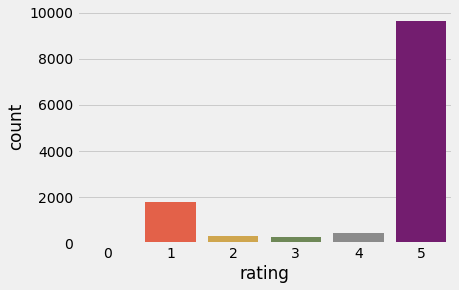

In [31]:
sns.countplot(x = 'rating', data = df)

In [34]:
df.to_csv('klarna.csv')

In [56]:
df['Brand'] = 'Klarna'

In [57]:
df.head()

,date,rating,reviews,Brand
0,[2020-09-06],5,Great experience! Smooth and simple transactio...,Klarna
1,[2020-09-06],5,Loved it! Needed to order a present for my sis...,Klarna
2,[2020-09-05],5,Love the convenience of paying installments,Klarna
3,[2020-09-05],5,It's not very often that I submit a review on ...,Klarna
4,[2020-09-05],5,If u need help they will help you,Klarna


### Scraping Reviews for Sezzle

In [35]:
#Load webpage content
url_ = 'https://au.trustpilot.com/review/sezzle.com?page=1'
resp = rq.get(url_)

In [36]:
#Convert to beautiful soup object
soup_ = bs(resp.text, 'html.parser')
type(soup_)

bs4.BeautifulSoup

In [37]:
#Find all the reviews on the first page
review_container_ = soup_.find_all('div', class_ = 'review-card')
print(type(review_container_))
print(len(review_container_))

<class 'bs4.element.ResultSet'>
20


In [38]:
#Print review container (1st page only)
review_container_

[<div class="review-card">
 <article class="review" data-review-domain-id="5ac378421aa92500012cbba8" data-review-domain-name="sezzle.com" data-review-is-reported="false" data-review-user-id="5f54d74ee3965c6461df1a5b" data-reviewmid="5f54d75f02e8570814010521" id="5f54d75f02e8570814010521">
 <script data-initial-state="review-info" type="application/json">
 {"socialShareUrl":"https://au.trustpilot.com/reviews/5f54d75f02e8570814010521","businessUnitId":"5ac378421aa92500012cbba8","businessUnitDisplayName":"Sezzle","consumerId":"5f54d74ee3965c6461df1a5b","consumerName":"Nicole Combs","reviewId":"5f54d75f02e8570814010521","reviewHeader":"Great Service","reviewBody":"I\u0027ve used Sezzle for two transactions now and have been completely satisfied with the service both times. Using Sezzle is a very convenient, fast and simple process. The only reason I\u0027m giving a 4 star rating is because of the limited stores available that have Sezzle as a payment option, when you use the app there is a

In [39]:
#Print only first review
first_review_ = review_container_[1]
first_review_

<div class="review-card">
<article class="review" data-review-domain-id="5ac378421aa92500012cbba8" data-review-domain-name="sezzle.com" data-review-is-reported="false" data-review-user-id="5f54d6bd08a128fbabd2c8d2" data-reviewmid="5f54d6ca02e85708c8e0ef67" id="5f54d6ca02e85708c8e0ef67">
<script data-initial-state="review-info" type="application/json">
{"socialShareUrl":"https://au.trustpilot.com/reviews/5f54d6ca02e85708c8e0ef67","businessUnitId":"5ac378421aa92500012cbba8","businessUnitDisplayName":"Sezzle","consumerId":"5f54d6bd08a128fbabd2c8d2","consumerName":"Nestor Vigil","reviewId":"5f54d6ca02e85708c8e0ef67","reviewHeader":"Very responsible","reviewBody":"Very responsible, never have any issue, thank you Sezzle.","stars":5,"hasBusinessUnitMergeHistory":false}
</script>
<aside class="review__consumer-information">
<a class="consumer-information" data-track-link="{'target': 'Consumer profile', 'name': 'consumer-info'}" href="/users/5f54d6bd08a128fbabd2c8d2">
<consumer-review-picture 

In [40]:
#From first review, extract the first rating /5
first_rating_ = str(first_review_.find('div', class_ = 'star-rating star-rating--medium'))

#Use re to find all numerical values in string
__ = re.findall('\d', first_rating_)

#Rating is the first numerical value of the string, extract it
first_rating_ = __[0]
print(first_rating_)

5


In [41]:
#From firts review, extract date/time stamp
first_posting_time_ = str(first_review_.find('div', class_ = 'review-content-header__dates'))

__d = re.findall('\d\d\d\d-\d\d-\d\d', first_posting_time_)

print(__d)

['2020-09-06']


In [42]:
#From first review, extract review text
first_rev_desc_ = str(first_review_.find('p', class_ = 'review-content__text'))

#Clean the string of empty spaces and '\n'
first_rev_desc_ = " ".join(first_rev_desc_.split())
first_rev_desc_ = first_rev_desc_.lstrip('<p class="review-content__text"> ')
first_rev_desc_ = first_rev_desc_.rstrip('</p>')
first_rev_desc_

'Very responsible, never have any issue, thank you Sezzle. '

In [43]:
#Create lists to score all scraped data in

ratings_ = []
dates_ = []
reviews_ = []

#Extract data from individual review containers
for container_ in review_container_:
    
    #Ratings
    rating_ = str(container_.find('div', class_ = 'star-rating star-rating--medium'))
    __ = re.findall('\d', rating_)
    rating_ = __[0]
    ratings_.append(rating_)
    
    #Dates
    date_ = str(container_.find('div', class_ = 'review-content-header__dates'))
    __d = re.findall('\d\d\d\d-\d\d-\d\d', date_)
    date_ = __d
    dates_.append(date_)
    
    #Reviews
    review_ = str(container_.find('p', class_ = 'review-content__text'))
    review_ = " ".join(review_.split())
    review_ = review_.lstrip('<p class="review-content__text"> ')
    review_ = review_.rstrip('</p>')
    reviews_.append(review_)

In [44]:
#Format all features into a Data Frame
tdf_ = pd.DataFrame({'date': dates_,
'rating': ratings_,
'reviews': reviews_,
})
print(tdf_.info())
tdf_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     20 non-null     object
 1   rating   20 non-null     object
 2   reviews  20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None


,date,rating,reviews
0,[2020-09-06],4,I've used Sezzle for two transactions now and ...
1,[2020-09-06],5,"Very responsible, never have any issue, thank ..."
2,[2020-09-06],4,Thank you sezzle for letting me buy the things...
3,[2020-09-05],5,"Easy to use. Its easy to use, i don't like hav..."
4,[2020-09-05],5,Love shopping through Sezzle ❤️❤️❤️❤️❤️❤️❤️❤️❤...
5,[2020-09-05],5,Love Sezzle!<br/>The sign up process was easy ...
6,[2020-09-05],1,No weekend support and cannot login. Keeps tel...
7,[2020-09-05],5,This is so easy so easy to set up! I was a lit...
8,[2020-09-05],5,I love Sezzle! While living on a budget Sezzle...
9,[2020-09-05],5,So nice to be able to spread my payments out. ...


In [45]:
#Create a list of pages for our program to loop into to collect data from all the review pages
pages_ = [str(i) for i in range(1,190)]

In [46]:
#Create lists to score all scraped data in

ratings_ = []
dates_ = []
reviews_ = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every page in the interval 1-179
for page_ in pages_:
    #Make a get request
    resp = rq.get('https://au.trustpilot.com/review/sezzle.com?page=' + page_)
    
    # Pause the loop
    sleep(randint(8,15))
    
    #Monitor requests
    requests += 1
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)
    
    # Throw a warning for non-200 status codes
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))

    # Break the loop if the number of requests is greater than expected
    if requests > 179:
        warn('Number of requests was greater than expected.')
        break
    
    # Parse the content of the request with BeautifulSoup
    page_html_ = bs(resp.text, 'html.parser')
    
    # Select all the 20 review containers from a single page
    rev_containers_ = page_html_.find_all('div', class_ = 'review-card')
    
    #For every review of those 20
    for container_ in rev_containers_:
        
        #Ratings
        rating_ = str(container_.find('div', class_ = 'star-rating star-rating--medium'))
        __ = re.findall('\d', rating_)
        rating_ = __[0]
        ratings_.append(rating_)
    
        #Dates
        date_ = str(container_.find('div', class_ = 'review-content-header__dates'))
        __d = re.findall('\d\d\d\d-\d\d-\d\d', date_)
        date_ = __d
        dates_.append(date_)
    
        #Reviews
        review_ = str(container_.find('p', class_ = 'review-content__text'))
        review_ = " ".join(review_.split())
        review_ = review_.lstrip('<p class="review-content__text"> ')
        review_ = review_.rstrip('</p>')
        reviews_.append(review_)

Request: 178; Frequency: 0.0748529287368097 requests/s


In [47]:
#Format all features into a Data Frame
df_ = pd.DataFrame({'date': dates_,
'rating': ratings_,
'reviews': reviews_,
})
print(df_.info())
df_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     3560 non-null   object
 1   rating   3560 non-null   object
 2   reviews  3560 non-null   object
dtypes: object(3)
memory usage: 83.6+ KB
None


,date,rating,reviews
0,[2020-09-06],4,I've used Sezzle for two transactions now and ...
1,[2020-09-06],5,"Very responsible, never have any issue, thank ..."
2,[2020-09-06],4,Thank you sezzle for letting me buy the things...
3,[2020-09-05],5,"Easy to use. Its easy to use, i don't like hav..."
4,[2020-09-05],5,Love shopping through Sezzle ❤️❤️❤️❤️❤️❤️❤️❤️❤...
...,...,...,...
3555,[2018-07-17],5,I love the option of paying out with no interest
3556,[2018-07-17],5,None
3557,[2018-07-17],5,This company is great!! Wish they were availab...
3558,[2018-07-17],5,None


In [48]:
df_.head()

,date,rating,reviews
0,[2020-09-06],4,I've used Sezzle for two transactions now and ...
1,[2020-09-06],5,"Very responsible, never have any issue, thank ..."
2,[2020-09-06],4,Thank you sezzle for letting me buy the things...
3,[2020-09-05],5,"Easy to use. Its easy to use, i don't like hav..."
4,[2020-09-05],5,Love shopping through Sezzle ❤️❤️❤️❤️❤️❤️❤️❤️❤...


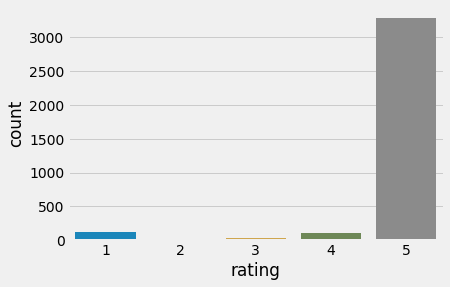

In [49]:
sns.countplot(x = 'rating', data = df_)

In [50]:
df_.to_csv('sezzle.csv')

In [54]:
df_['Brand'] = 'Sezzle'

In [55]:
df_.head()

,date,rating,reviews,Brand
0,[2020-09-06],4,I've used Sezzle for two transactions now and ...,Sezzle
1,[2020-09-06],5,"Very responsible, never have any issue, thank ...",Sezzle
2,[2020-09-06],4,Thank you sezzle for letting me buy the things...,Sezzle
3,[2020-09-05],5,"Easy to use. Its easy to use, i don't like hav...",Sezzle
4,[2020-09-05],5,Love shopping through Sezzle ❤️❤️❤️❤️❤️❤️❤️❤️❤...,Sezzle


## Text Cleaning

In [58]:
#Combine both dataframes
frames = [df, df_]
df = pd.concat(frames)
df.head()

,date,rating,reviews,Brand
0,[2020-09-06],5,Great experience! Smooth and simple transactio...,Klarna
1,[2020-09-06],5,Loved it! Needed to order a present for my sis...,Klarna
2,[2020-09-05],5,Love the convenience of paying installments,Klarna
3,[2020-09-05],5,It's not very often that I submit a review on ...,Klarna
4,[2020-09-05],5,If u need help they will help you,Klarna


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16040 entries, 0 to 3559
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     16040 non-null  object
 1   rating   16040 non-null  object
 2   reviews  16040 non-null  object
 3   Brand    16040 non-null  object
dtypes: object(4)
memory usage: 626.6+ KB


In [61]:
#Set date column as the index
df = df.set_index('date')

In [62]:
#Change all characters to lowercase
df['reviews'] = df['reviews'].apply(lambda x: x.lower())
print(df.head())

             rating                                            reviews   Brand
date                                                                          
[2020-09-06]      5  great experience! smooth and simple transactio...  Klarna
[2020-09-06]      5  loved it! needed to order a present for my sis...  Klarna
[2020-09-05]      5       love the convenience of paying installments   Klarna
[2020-09-05]      5  it's not very often that i submit a review on ...  Klarna
[2020-09-05]      5                 if u need help they will help you   Klarna


In [63]:
apostrophe_dict ={"ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'let us',
 "ma'am": 'madam',
 "mayn't": 'may not',
 "might've": 'might have',
 "mightn't": 'might not',
 "mightn't've": 'might not have',
 "must've": 'must have',
 "mustn't": 'must not',
 "mustn't've": 'must not have',
 "needn't": 'need not',
 "needn't've": 'need not have',
 "o'clock": 'of the clock',
 "oughtn't": 'ought not',
 "oughtn't've": 'ought not have',
 "shan't": 'shall not',
 "sha'n't": 'shall not',
 "shan't've": 'shall not have',
 "she'd": 'she had / she would',
 "she'd've": 'she would have',
 "she'll": 'she shall / she will',
 "she'll've": 'she shall have / she will have',
 "she's": 'she has / she is',
 "should've": 'should have',
 "shouldn't": 'should not',
 "shouldn't've": 'should not have',
 "so've": 'so have',
 "so's": 'so as / so is',
 "that'd": 'that would / that had',
 "that'd've": 'that would have',
 "that's": 'that has / that is',
 "there'd": 'there had / there would',
 "there'd've": 'there would have',
 "there's": 'there has / there is',
 "they'd": 'they had / they would',
 "they'd've": 'they would have',
 "they'll": 'they shall / they will',
 "they'll've": 'they shall have / they will have',
 "they're": 'they are',
 "they've": 'they have',
 "to've": 'to have',
 "wasn't": 'was not',
 "we'd": 'we had / we would',
 "we'd've": 'we would have',
 "we'll": 'we will',
 "we'll've": 'we will have',
 "we're": 'we are',
 "we've": 'we have',
 "weren't": 'were not',
 "what'll": 'what shall / what will',
 "what'll've": 'what shall have / what will have',
 "what're": 'what are',
 "what's": 'what has / what is',
 "what've": 'what have',
 "when's": 'when has / when is',
 "when've": 'when have',
 "where'd": 'where did',
 "where's": 'where has / where is',
 "where've": 'where have',
 "who'll": 'who shall / who will',
 "who'll've": 'who shall have / who will have',
 "who's": 'who has / who is',
 "who've": 'who have',
 "why's": 'why has / why is',
 "why've": 'why have',
 "will've": 'will have',
 "won't": 'will not',
 "won't've": 'will not have',
 "would've": 'would have',
 "wouldn't": 'would not',
 "wouldn't've": 'would not have',
 "y'all": 'you all',
 "y'all'd": 'you all would',
 "y'all'd've": 'you all would have',
 "y'all're": 'you all are',
 "y'all've": 'you all have',
 "you'd": 'you had / you would',
 "you'd've": 'you would have',
 "you'll": 'you shall / you will',
 "you'll've": 'you shall have / you will have',
 "you're": 'you are',
 "you've": 'you have'}

In [64]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [65]:
df['reviews'] = df['reviews'].apply(lambda x: lookup_dict(x,apostrophe_dict))

In [66]:
df.head(10)

,rating,reviews,Brand
date,,,
[2020-09-06],5,great experience! smooth and simple transactio...,Klarna
[2020-09-06],5,loved it! needed to order a present for my sis...,Klarna
[2020-09-05],5,love the convenience of paying installments,Klarna
[2020-09-05],5,it has / it is not very often that i submit a ...,Klarna
[2020-09-05],5,if u need help they will help you,Klarna
[2020-09-05],5,great experience! i didn’t have to remember my...,Klarna
[2020-09-05],5,excellent service very easy to access and use,Klarna
[2020-09-05],1,i signed up for klarna threw the app. it let m...,Klarna
[2020-09-05],5,great to have been able to use this way of pay...,Klarna


In [67]:
df.shape

(16040, 3)

In [68]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [69]:
df['reviews'] = df['reviews'].apply(lambda x: lookup_dict(x,short_word_dict))

In [70]:
df['reviews'] = df['reviews'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))

In [71]:
df['reviews'] = df['reviews'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))

In [72]:
#Replace numbers with spaces
df['reviews'] = df['reviews'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))

In [73]:
#Removing words with length 1
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

In [74]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [76]:
df.reviews[0]

'great experience smooth and simple transaction would definitely use the method of paying again'

In [78]:
text = df.reviews.astype(str)
text

date
[2020-09-06]    great experience smooth and simple transaction...
[2020-09-06]    loved it needed to order present for my sister...
[2020-09-05]          love the convenience of paying installments
[2020-09-05]    it has it is not very often that submit review...
[2020-09-05]                if you need help they will help yoyou
                                      ...                        
[2018-07-17]       love the option of paying out with no interest
[2018-07-17]                                                 none
[2018-07-17]    this company is great wish they were available...
[2018-07-17]                                                 none
[2018-07-17]                                                 none
Name: reviews, Length: 16040, dtype: object

In [108]:
df['reviews_tokenized'] = df['reviews'].apply(word_tokenize)

In [110]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('br')

In [111]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [112]:
#Importing stop words from nltk
stop_words = set(stopwords)
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'br',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'ow

In [113]:
# Created new columns of tokens - where stop words are being removed
df['reviews_filtered'] = df['reviews_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,rating,reviews,Brand,reviews_tokenized,reviews_filtered
date,,,,,
[2020-09-06],5,great experience smooth and simple transaction...,Klarna,"[great, experience, smooth, and, simple, trans...","[great, experience, smooth, simple, transactio..."
[2020-09-06],5,loved it needed to order present for my sister...,Klarna,"[loved, it, needed, to, order, present, for, m...","[loved, needed, order, present, sisters, birth..."
[2020-09-05],5,love the convenience of paying installments,Klarna,"[love, the, convenience, of, paying, installme...","[love, convenience, paying, installments]"
[2020-09-05],5,it has it is not very often that submit review...,Klarna,"[it, has, it, is, not, very, often, that, subm...","[often, submit, review, company, however, come..."
[2020-09-05],5,if you need help they will help yoyou,Klarna,"[if, you, need, help, they, will, help, yoyou]","[need, help, help, yoyou]"


In [114]:
df.to_csv('bnpl.csv')

## Stemming & Lemmatization

In [115]:
# Import library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [117]:
df['reviews_stemmed'] = df['reviews_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))

In [118]:
# Importing library for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [119]:
df['reviews_lemmatized'] = df['reviews_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))

In [120]:
#Categorise ratings as 'Positive', 'Neutral' & 'Negative'

df['rating'] = df['rating'].astype(float)

In [121]:
df['rating'] = pd.cut(df['rating'], bins=[0, 2, 3, 5], include_lowest=True, labels=['Negative', 'Neutral', 'Positive'])

In [122]:
df.head(10)

,rating,reviews,Brand,reviews_tokenized,reviews_filtered,reviews_stemmed,reviews_lemmatized
date,,,,,,,
[2020-09-06],Positive,great experience smooth and simple transaction...,Klarna,"[great, experience, smooth, and, simple, trans...","[great, experience, smooth, simple, transactio...",great experi smooth simpl transact would defin...,great experience smooth simple transaction wou...
[2020-09-06],Positive,loved it needed to order present for my sister...,Klarna,"[loved, it, needed, to, order, present, for, m...","[loved, needed, order, present, sisters, birth...",love need order present sister birthday short ...,loved needed order present sister birthday sho...
[2020-09-05],Positive,love the convenience of paying installments,Klarna,"[love, the, convenience, of, paying, installme...","[love, convenience, paying, installments]",love conveni pay instal,love convenience paying installment
[2020-09-05],Positive,it has it is not very often that submit review...,Klarna,"[it, has, it, is, not, very, often, that, subm...","[often, submit, review, company, however, come...",often submit review compani howev come play mo...,often submit review company however come playi...
[2020-09-05],Positive,if you need help they will help yoyou,Klarna,"[if, you, need, help, they, will, help, yoyou]","[need, help, help, yoyou]",need help help yoyou,need help help yoyou
[2020-09-05],Positive,great experience didn have to remember my paym...,Klarna,"[great, experience, didn, have, to, remember, ...","[great, experience, remember, payments, remind...",great experi rememb payment remind everi step ...,great experience remember payment reminded eve...
[2020-09-05],Positive,excellent service very easy to access and use,Klarna,"[excellent, service, very, easy, to, access, a...","[excellent, service, easy, access, use]",excel servic easi access use,excellent service easy access use
[2020-09-05],Negative,signed up for klarna threw the app it let me m...,Klarna,"[signed, up, for, klarna, threw, the, app, it,...","[signed, klarna, threw, app, let, make, ghost,...",sign klarna threw app let make ghost card let ...,signed klarna threw app let make ghost card le...
[2020-09-05],Positive,great to have been able to use this way of pay...,Klarna,"[great, to, have, been, able, to, use, this, w...","[great, able, use, way, paying, product, usefu...",great abl use way pay product use consid go wo...,great able use way paying product useful consi...


In [123]:
#Delete all rows with 'None' as reviews
df = df[~df.reviews_stemmed.str.contains("none")]
df.head(10)

,rating,reviews,Brand,reviews_tokenized,reviews_filtered,reviews_stemmed,reviews_lemmatized
date,,,,,,,
[2020-09-06],Positive,great experience smooth and simple transaction...,Klarna,"[great, experience, smooth, and, simple, trans...","[great, experience, smooth, simple, transactio...",great experi smooth simpl transact would defin...,great experience smooth simple transaction wou...
[2020-09-06],Positive,loved it needed to order present for my sister...,Klarna,"[loved, it, needed, to, order, present, for, m...","[loved, needed, order, present, sisters, birth...",love need order present sister birthday short ...,loved needed order present sister birthday sho...
[2020-09-05],Positive,love the convenience of paying installments,Klarna,"[love, the, convenience, of, paying, installme...","[love, convenience, paying, installments]",love conveni pay instal,love convenience paying installment
[2020-09-05],Positive,it has it is not very often that submit review...,Klarna,"[it, has, it, is, not, very, often, that, subm...","[often, submit, review, company, however, come...",often submit review compani howev come play mo...,often submit review company however come playi...
[2020-09-05],Positive,if you need help they will help yoyou,Klarna,"[if, you, need, help, they, will, help, yoyou]","[need, help, help, yoyou]",need help help yoyou,need help help yoyou
[2020-09-05],Positive,great experience didn have to remember my paym...,Klarna,"[great, experience, didn, have, to, remember, ...","[great, experience, remember, payments, remind...",great experi rememb payment remind everi step ...,great experience remember payment reminded eve...
[2020-09-05],Positive,excellent service very easy to access and use,Klarna,"[excellent, service, very, easy, to, access, a...","[excellent, service, easy, access, use]",excel servic easi access use,excellent service easy access use
[2020-09-05],Negative,signed up for klarna threw the app it let me m...,Klarna,"[signed, up, for, klarna, threw, the, app, it,...","[signed, klarna, threw, app, let, make, ghost,...",sign klarna threw app let make ghost card let ...,signed klarna threw app let make ghost card le...
[2020-09-05],Positive,great to have been able to use this way of pay...,Klarna,"[great, to, have, been, able, to, use, this, w...","[great, able, use, way, paying, product, usefu...",great abl use way pay product use consid go wo...,great able use way paying product useful consi...


In [124]:
print(df.shape)

(13596, 7)


# EDA

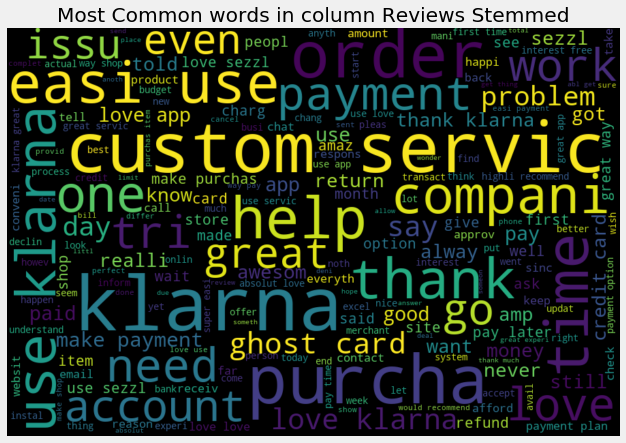

In [125]:
#visualizing all the words in column "reviews_stemmed" in our data using the wordcloud plot.
all_words = ' '.join([text for text in df['reviews_stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Reviews Stemmed")
plt.show()

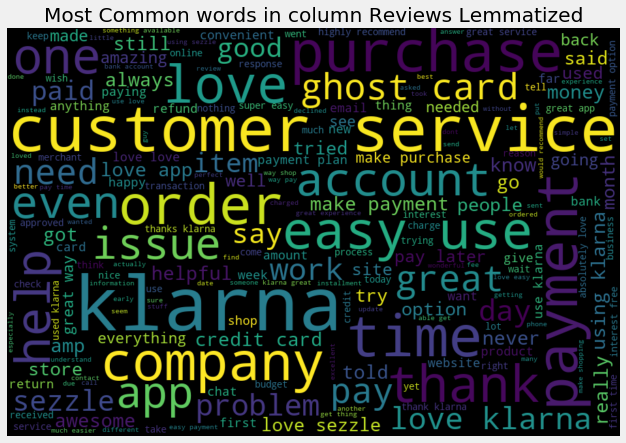

In [323]:
#visualizing all the words in column "reviews_stemmed" in our data using the wordcloud plot.
all_words = ' '.join([text for text in df['reviews_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Reviews Lemmatized")
plt.show()

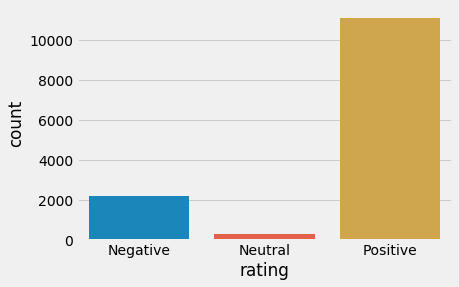

In [332]:
#Training set countplot
sns.countplot(x = 'rating', data = df)

In [470]:
df.groupby('rating')['rating'].count()

rating
Negative     2190
Neutral       306
Positive    11100
Name: rating, dtype: int64

In [132]:
df['rating'].value_counts(normalize=True)

Positive    0.816417
Negative    0.161077
Neutral     0.022507
Name: rating, dtype: float64

# NLP Using ML Techniques

## TF-IDF Vectorizer

In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(min_df=2)

In [178]:
tfidf_lemm = tfidf_vect.fit_transform(df['reviews_lemmatized'])

print("tfidf_lemm:\n{}".format(repr(tfidf_lemm)))

tfidf_lemm:
<13596x4479 sparse matrix of type '<class 'numpy.float64'>'
	with 199692 stored elements in Compressed Sparse Row format>


In [468]:
X_tf = tfidf_lemm
y_tf = df['rating']

#Splitting data into training and testing set
X_train_tflemm, X_test_tflemm, y_train_tflemm, y_test_tflemm = train_test_split(X_tf, y_tf, test_size=0.20, random_state=42)

In [469]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from xgboost import XGBClassifier

LR = LogisticRegression()
LRCV = LogisticRegressionCV()
NB = naive_bayes.MultinomialNB()
KNN = KNeighborsClassifier(n_neighbors=7)
XGB = XGBClassifier()

In [367]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

LR.fit(X_train_tflemm, y_train_tflemm)
LRCV.fit(X_train_tflemm, y_train_tflemm)
NB.fit(X_train_tflemm, y_train_tflemm)
KNN.fit(X_train_tflemm, y_train_tflemm)
XGB.fit(X_train_tflemm, y_train_tflemm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [480]:
KNN.fit(X_train_tflemm, y_train_tflemm)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [414]:
labels = ['Neg', 'Neut', 'Pos']

In [328]:
def show_summary_report(actual, prediction):

    #if isinstance(actual, pd.Series):
    #    actual = actual.values.astype(int)
    #prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction,average=None)
    recall_ = recall_score(actual, prediction,average=None)

    print('Accuracy : ', accuracy_)
    print('Precision: ', precision_)
    print('Recall   : ', recall_)   
    print('Labels   : ', labels)
    print('-' * 107)
    #print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    #precision, recall, _ = precision_recall_curve(actual, prediction)
    #average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    #fpr, tpr, _ = roc_curve(actual, prediction)
    #roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 1, figsize = (10, 10))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax,xticklabels=labels,yticklabels=labels)

    ax.set_title('Confusion Matrix')
    ax.set_xlabel('True label')
    ax.set_ylabel('Predicted label')
    '''
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')
    '''
    '''
    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')
    '''

    plt.show()
    
    return (accuracy_, precision_, recall_)

In [351]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc

***********************
* Logistic Regression *
***********************
Accuracy :  0.9466911764705882
Precision:  [0.84444444 0.         0.96457883]
Recall   :  [0.84863524 0.         0.98849048]
Labels   :  ['Neg', 'Neut', 'Pos']
-----------------------------------------------------------------------------------------------------------


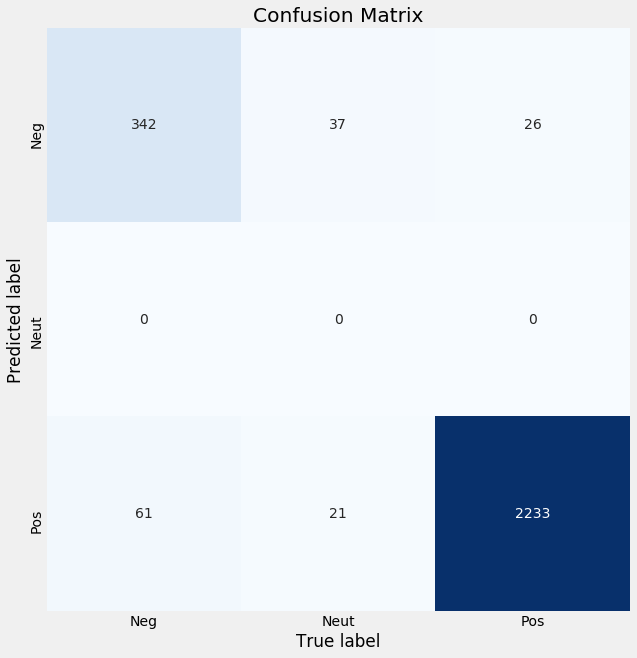


**************************
* Logistic Regression CV *
**************************
Accuracy :  0.9463235294117647
Precision:  [0.83373494 0.4        0.96782609]
Recall   :  [0.85856079 0.03448276 0.98539177]
Labels   :  ['Neg', 'Neut', 'Pos']
-----------------------------------------------------------------------------------------------------------


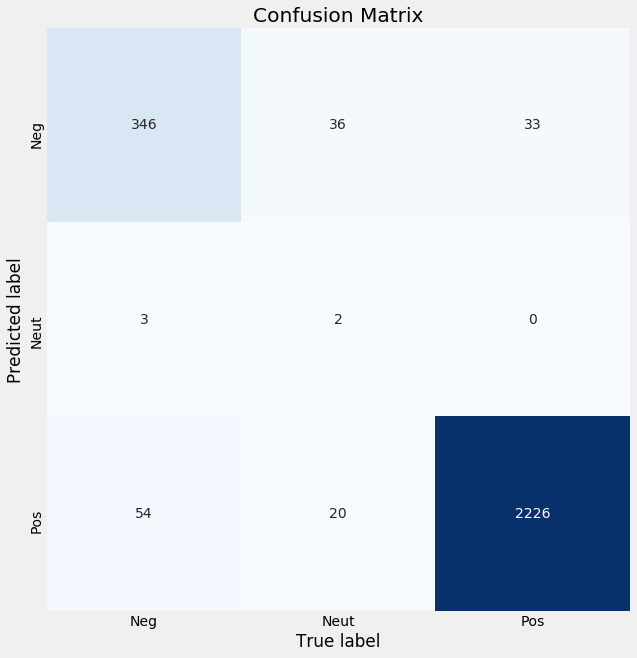


***************
* Naive Bayes *
***************
Accuracy :  0.9349264705882353
Precision:  [0.87106017 0.         0.94432729]
Recall   :  [0.75434243 0.         0.99114653]
Labels   :  ['Neg', 'Neut', 'Pos']
-----------------------------------------------------------------------------------------------------------


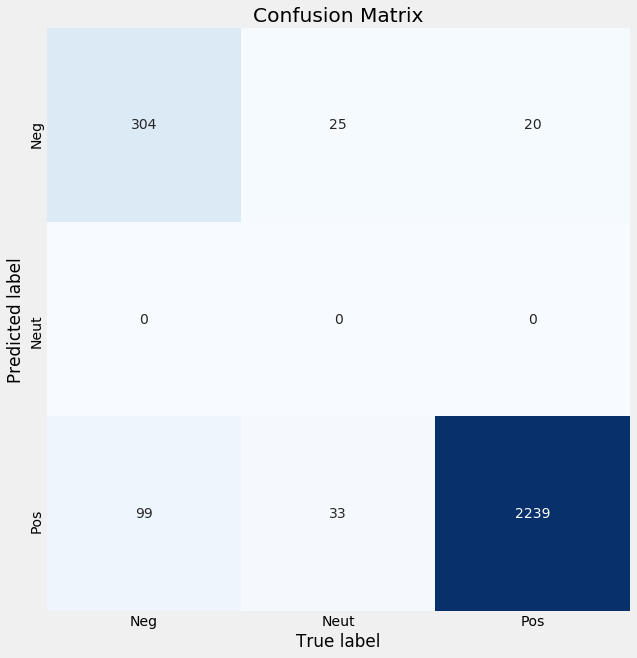


***********************
* K Nearest Neighbour *
***********************
Accuracy :  0.8308823529411765
Precision:  [1.         0.         0.83082015]
Recall   :  [0.00248139 0.         1.        ]
Labels   :  ['Neg', 'Neut', 'Pos']
-----------------------------------------------------------------------------------------------------------


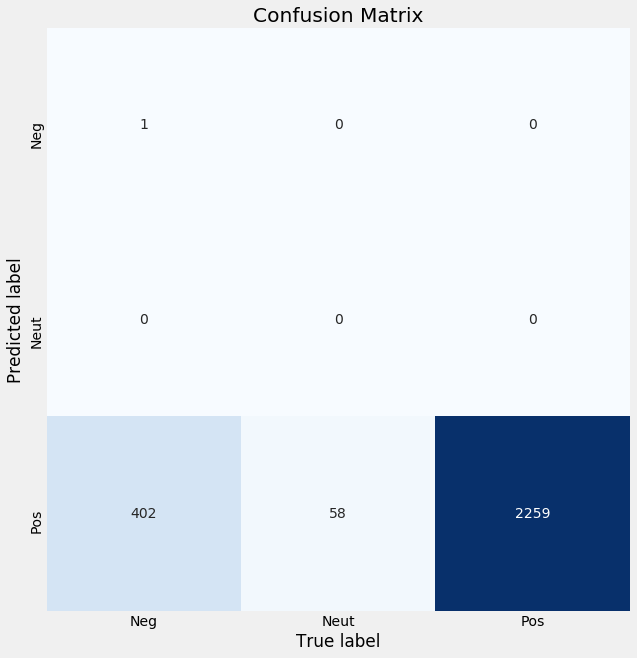


***********
* XGBoost *
***********
Accuracy :  0.9172794117647058
Precision:  [0.82866044 0.         0.93068894]
Recall   :  [0.66004963 0.         0.98671979]
Labels   :  ['Neg', 'Neut', 'Pos']
-----------------------------------------------------------------------------------------------------------


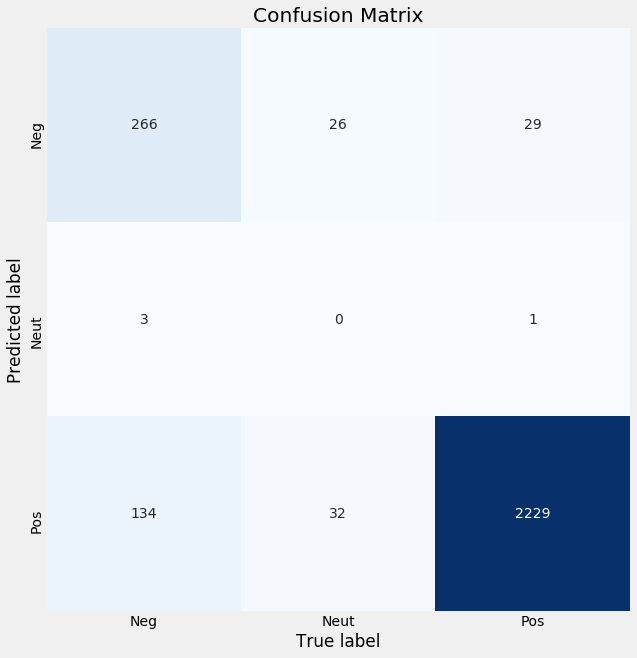

In [331]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall'])

models = ['Logistic Regression','Logistic Regression CV','Naive Bayes','K Nearest Neighbour','XGBoost']
for i, m in enumerate([LR, LRCV, NB, KNN, XGB]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_test_tflemm)
    # show the report
    accuracy_, precision_, recall_ = show_summary_report(y_test_tflemm, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_}
    print()

In [479]:
y_test_tflemm.value_counts()

Positive    2259
Negative     403
Neutral       58
Name: rating, dtype: int64

# NLP Using Neural Networks

In [140]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing

In [144]:
#Use Label Encoder to transform rating to numerical target
label_encoder = preprocessing.LabelEncoder()

df['rating_num']= label_encoder.fit_transform(df['rating']) 
df.head()

,rating,reviews,Brand,reviews_tokenized,reviews_filtered,reviews_stemmed,reviews_lemmatized,rating_num
date,,,,,,,,
[2020-09-06],Positive,great experience smooth and simple transaction...,Klarna,"[great, experience, smooth, and, simple, trans...","[great, experience, smooth, simple, transactio...",great experi smooth simpl transact would defin...,great experience smooth simple transaction wou...,2
[2020-09-06],Positive,loved it needed to order present for my sister...,Klarna,"[loved, it, needed, to, order, present, for, m...","[loved, needed, order, present, sisters, birth...",love need order present sister birthday short ...,loved needed order present sister birthday sho...,2
[2020-09-05],Positive,love the convenience of paying installments,Klarna,"[love, the, convenience, of, paying, installme...","[love, convenience, paying, installments]",love conveni pay instal,love convenience paying installment,2
[2020-09-05],Positive,it has it is not very often that submit review...,Klarna,"[it, has, it, is, not, very, often, that, subm...","[often, submit, review, company, however, come...",often submit review compani howev come play mo...,often submit review company however come playi...,2
[2020-09-05],Positive,if you need help they will help yoyou,Klarna,"[if, you, need, help, they, will, help, yoyou]","[need, help, help, yoyou]",need help help yoyou,need help help yoyou,2


In [302]:
from sklearn.model_selection import train_test_split

X = df['reviews_lemmatized']
y = df['rating_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (10876,)
X_test shape:  (2720,)
y_train shape:  (10876,)
y_test shape:  (2720,)


In [303]:
tokenizer_obj = Tokenizer()
total_reviews = df['reviews_lemmatized']
tokenizer_obj.fit_on_texts(total_reviews)

In [304]:
max_length = max([len(s.split()) for s in df['reviews_lemmatized']])
max_length

484

In [305]:
vocab_size = len(tokenizer_obj.word_index) + 1
vocab_size

8567

In [306]:
X_train_tokens = tokenizer_obj.texts_to_sequences(X_train)
X_test_tokens = tokenizer_obj.texts_to_sequences(X_test)

In [307]:
X_train_pad = pad_sequences(X_train_tokens, maxlen = max_length, padding = 'post')
X_test_pad = pad_sequences(X_test_tokens, maxlen = max_length, padding = 'post')

In [308]:
print(X_train[3])
print(X_train_tokens[3])
print(X_train_pad[3])

klarna awesome gave chance getting stuff afford recommend anyone used many time never problem
[1, 52, 256, 451, 149, 213, 153, 51, 182, 41, 120, 9, 33, 57]
[  1  52 256 451 149 213 153  51 182  41 120   9  33  57   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 

## Build Model

In [199]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [309]:
embedding_dim = 100

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation = 'tanh'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [310]:
history = model.fit(X_train_pad, y_train, batch_size = 128, epochs = 25, validation_data = (X_test_pad, y_test), verbose = 1)

Train on 10876 samples, validate on 2720 samples
Epoch 1/25
10876/10876 [==============================] - 5s 481us/sample - loss: 0.0454 - acc: 0.0261 - val_loss: -0.4640 - val_acc: 0.0213
Epoch 2/25
10876/10876 [==============================] - 3s 310us/sample - loss: -0.5724 - acc: 0.0228 - val_loss: -0.7286 - val_acc: 0.0213
Epoch 3/25
10876/10876 [==============================] - 4s 323us/sample - loss: -0.7618 - acc: 0.0228 - val_loss: -0.8926 - val_acc: 0.0213
Epoch 4/25
10876/10876 [==============================] - 4s 322us/sample - loss: -0.9090 - acc: 0.0228 - val_loss: -1.0377 - val_acc: 0.0213
Epoch 5/25
10876/10876 [==============================] - 4s 329us/sample - loss: -1.0438 - acc: 0.0228 - val_loss: -1.1745 - val_acc: 0.0213
Epoch 6/25
10876/10876 [==============================] - 4s 407us/sample - loss: -1.1718 - acc: 0.0228 - val_loss: -1.3050 - val_acc: 0.0213
Epoch 7/25
10876/10876 [==============================] - 4s 353us/sample - loss: -1.2948 - acc: 0.0

In [311]:
#GRU
embedding_dim = 100

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length = max_length))
model.add(GRU(units = 60, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = 'tanh'))

#trying different optimizers & configurations
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [312]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 484, 100)          856700    
_________________________________________________________________
gru_10 (GRU)                 (None, 60)                28980     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 61        
Total params: 885,741
Trainable params: 885,741
Non-trainable params: 0
_________________________________________________________________


In [314]:
model.fit(X_train_pad, y_train, batch_size = 64, epochs = 25, validation_data = (X_test_pad, y_test), verbose = 1)

Train on 10876 samples, validate on 2720 samples
Epoch 1/25
10876/10876 [==============================] - 100s 9ms/step - loss: nan - accuracy: 3.6778e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/25
10876/10876 [==============================] - 91s 8ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/25
10876/10876 [==============================] - 94s 9ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/25
10876/10876 [==============================] - 102s 9ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/25
10876/10876 [==============================] - 119s 11ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/25
10876/10876 [==============================] - 107s 10ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/25
10876/10876 [===========================

In [254]:
tokenizer_obj.word_docs

defaultdict(int,
            {'would': 1282,
             'paying': 498,
             'use': 2573,
             'method': 164,
             'experience': 716,
             'great': 2635,
             'simple': 338,
             'definitely': 474,
             'transaction': 229,
             'smooth': 207,
             'cash': 113,
             'needed': 382,
             'paid': 840,
             'short': 94,
             'birthday': 65,
             'rest': 47,
             'order': 1006,
             'loved': 158,
             'sister': 8,
             'payment': 3903,
             'awesome': 758,
             'present': 39,
             'love': 3793,
             'convenience': 76,
             'installment': 499,
             'take': 384,
             'shall': 106,
             'placed': 99,
             'throughly': 3,
             'playing': 8,
             'risk': 19,
             'made': 775,
             'often': 52,
             'received': 396,
             'best': 781,
   

## Word2Vec

In [249]:
import string
from nltk.tokenize import word_tokenize

In [256]:
review_lines = list()
lines = df['reviews_lemmatized'].values.tolist()

for line in lines:
    tokens = word_tokenize(line)
    review_lines.append(tokens)

In [259]:
review_lines

[['great',
  'experience',
  'smooth',
  'simple',
  'transaction',
  'would',
  'definitely',
  'use',
  'method',
  'paying'],
 ['loved',
  'needed',
  'order',
  'present',
  'sister',
  'birthday',
  'short',
  'cash',
  'paid',
  'rest',
  'payment',
  'awesome'],
 ['love', 'convenience', 'paying', 'installment'],
 ['often',
  'submit',
  'review',
  'company',
  'however',
  'come',
  'playing',
  'money',
  'reading',
  'review',
  'going',
  'tell',
  'whether',
  'something',
  'want',
  'take',
  'risk',
  'started',
  'klarna',
  'small',
  'purchase',
  'subsequently',
  'made',
  'several',
  'purchase',
  'absolutely',
  'issue',
  'fund',
  'earlier',
  'shall',
  'pay',
  'sooner',
  'make',
  'sure',
  'available',
  'payment',
  'coming',
  'say',
  'throughly',
  'pleased',
  'impressed',
  'service',
  'transparency',
  'fence',
  'start',
  'something',
  'small',
  'instance',
  'first',
  'one',
  'saw',
  'immediate',
  'response',
  'ordered',
  'something',
  

In [257]:
len(review_lines)

13596

In [252]:
import gensim

In [258]:
#train word2vec
mdl = gensim.models.Word2Vec(sentences = review_lines, size = embedding_dim, window = 5, workers = 4, min_count = 1)
#vocab list
words = list(mdl.wv.vocab)
print(len(words))

8566


In [270]:
mdl.wv.most_similar('klarna')

[('discovered', 0.9380766153335571),
 ('diffrent', 0.9380262494087219),
 ('site', 0.9378955364227295),
 ('began', 0.9347777366638184),
 ('place', 0.9344751238822937),
 ('scared', 0.9338864088058472),
 ('flawlessly', 0.9335141777992249),
 ('started', 0.9329814314842224),
 ('flower', 0.9322597980499268),
 ('retailer', 0.9314497709274292)]

In [271]:
mdl.wv.most_similar('sezzle')

[('convenience', 0.975446343421936),
 ('purchasing', 0.9721893668174744),
 ('favourite', 0.9715707898139954),
 ('ease', 0.9702696204185486),
 ('doable', 0.9697384834289551),
 ('holiday', 0.968408465385437),
 ('christmas', 0.967085599899292),
 ('favorite', 0.9653483629226685),
 ('absolutely', 0.9652780890464783),
 ('breeze', 0.9641298055648804)]

In [281]:
mdl.wv.most_similar_cosmul(positive = ['klarna', 'sezzle'])

[('wherever', 0.9334431886672974),
 ('boyfriend', 0.9325135946273804),
 ('regularly', 0.9291398525238037),
 ('juice', 0.9265215396881104),
 ('happier', 0.9264016151428223),
 ('loved', 0.9259833097457886),
 ('faithfully', 0.9253250956535339),
 ('often', 0.9252061247825623),
 ('sephora', 0.9251343607902527),
 ('stumbled', 0.9250950813293457)]

In [283]:
#Save model and use for Neural Networks
filename = 'w2v_bnpl.txt'
mdl.wv.save_word2vec_format(filename, binary = False)

In [286]:
# Load word embedding as a directory for words to vectors

import os

embeddings_index = {}
f = open(os.path.join('', 'w2v_bnpl.txt'), encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()

In [289]:
#vectorize the text samples into a 2D integer tensor
tokenizer_obj.fit_on_texts(review_lines)
sequences = tokenizer_obj.texts_to_sequences(review_lines)

#pad sequences
word_idx = tokenizer_obj.word_index
print('Found %s unique tokens.' %len(word_idx))

review_pad = pad_sequences(sequences, maxlen = max_length)
sentiment = df['rating_num'].values
print('Shape of review tensor: ', review_pad.shape)
print('Shape of sentiment tensor: ', sentiment.shape)

Found 8566 unique tokens.
Shape of review tensor:  (13596, 484)
Shape of sentiment tensor:  (13596,)


In [292]:
print(num_words)

8567


In [315]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

#define model
model = Sequential()
embedding_layer = Embedding(num_words,
                           embedding_dim,
                           embeddings_initializer = Constant(embedding_matrix),
                           input_length = max_length,
                           trainable = False)
model.add(embedding_layer)
model.add(GRU(units = 32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = 'sigmoid'))

#using different optimizers & their configs
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [316]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 484, 100)          856700    
_________________________________________________________________
gru_11 (GRU)                 (None, 32)                12768     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 869,501
Trainable params: 12,801
Non-trainable params: 856,700
_________________________________________________________________


In [317]:
#split data into training/validation set
validation_split = 0.2

indices = np.arange(review_pad.shape[0])
np.random.shuffle(indices)
review_pad = review_pad[indices]
sentiment = sentiment[indices]
num_validation_samples = int(validation_split * review_pad.shape[0])

X_train_w2v_pad = review_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
X_test_w2v_pad = review_pad[-num_validation_samples:]
y_test = sentiment[-num_validation_samples:]

In [318]:
print('Shape of X_train_w2v_pad tensor:', X_train_w2v_pad.shape)
print('Shape of y_train tensor:', y_train.shape)

print('Shape of X_test_w2v_pad tensor:', X_test_w2v_pad.shape)
print('Shape of y_test tensor:', y_test.shape)

Shape of X_train_w2v_pad tensor: (10877, 484)
Shape of y_train tensor: (10877,)
Shape of X_test_w2v_pad tensor: (2719, 484)
Shape of y_test tensor: (2719,)


In [299]:
model.fit(X_train_w2v_pad, y_train, batch_size = 128, epochs = 25, validation_data = (X_test_w2v_pad, y_test), verbose = 1)

Train on 10877 samples, validate on 2719 samples
Epoch 1/25
10877/10877 [==============================] - 45s 4ms/step - loss: 39279599321556.2812 - accuracy: 0.0245 - val_loss: -1.1899 - val_accuracy: 0.0228
Epoch 2/25
10877/10877 [==============================] - 46s 4ms/step - loss: nan - accuracy: 0.0075 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/25
10877/10877 [==============================] - 52s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/25
10877/10877 [==============================] - 40s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/25
10877/10877 [==============================] - 39s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/25
10877/10877 [==============================] - 38s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/25
10877/10877 [=========================

In [319]:
#define model
model = Sequential()
embedding_layer = Embedding(num_words,
                           embedding_dim,
                           embeddings_initializer = Constant(embedding_matrix),
                           input_length = max_length,
                           trainable = False)
model.add(embedding_layer)
model.add(LSTM(units = 32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.add(Dense(1, activation = 'tanh'))

#using different optimizers & their configs
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [320]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 484, 100)          856700    
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 2         
Total params: 873,759
Trainable params: 17,059
Non-trainable params: 856,700
_________________________________________________________________


In [321]:
model.fit(X_train_w2v_pad, y_train, batch_size = 128, epochs = 25, validation_data = (X_test_w2v_pad, y_test), verbose = 1)

Train on 10877 samples, validate on 2719 samples
Epoch 1/25
10877/10877 [==============================] - 62s 6ms/step - loss: -0.2364 - accuracy: 0.0303 - val_loss: -0.6192 - val_accuracy: 0.0169
Epoch 2/25
10877/10877 [==============================] - 55s 5ms/step - loss: -0.7307 - accuracy: 0.0239 - val_loss: -0.9222 - val_accuracy: 0.0169
Epoch 3/25
10877/10877 [==============================] - 49s 5ms/step - loss: -1.0034 - accuracy: 0.0239 - val_loss: -1.1873 - val_accuracy: 0.0169
Epoch 4/25
10877/10877 [==============================] - 48s 4ms/step - loss: -1.2484 - accuracy: 0.0239 - val_loss: -1.4319 - val_accuracy: 0.0169
Epoch 5/25
10877/10877 [==============================] - 50s 5ms/step - loss: -1.4757 - accuracy: 0.0239 - val_loss: -1.6608 - val_accuracy: 0.0169
Epoch 6/25
10877/10877 [==============================] - 50s 5ms/step - loss: -1.6913 - accuracy: 0.0239 - val_loss: -1.8801 - val_accuracy: 0.0169
Epoch 7/25
10877/10877 [==============================] -